# *AutoEncoder* 
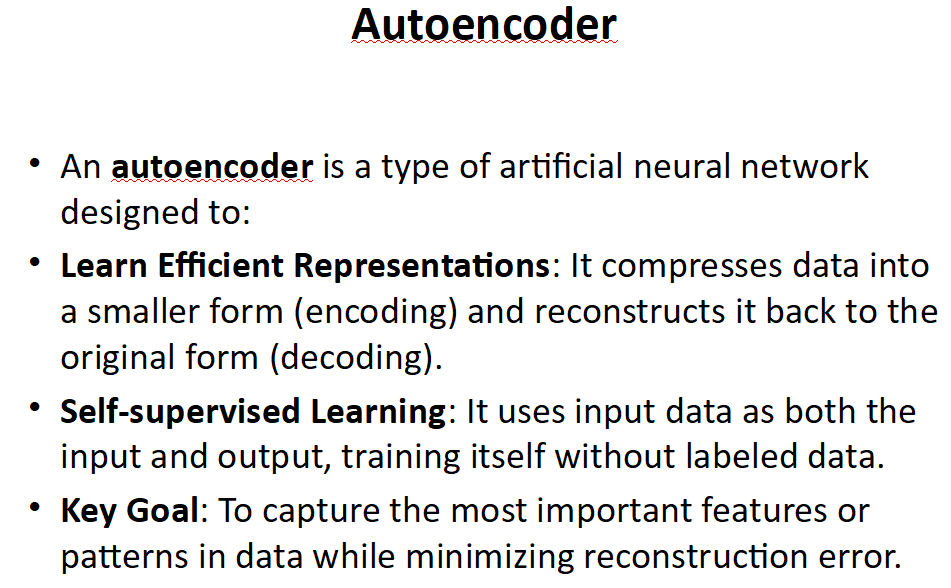]

# *Encoder Layer*
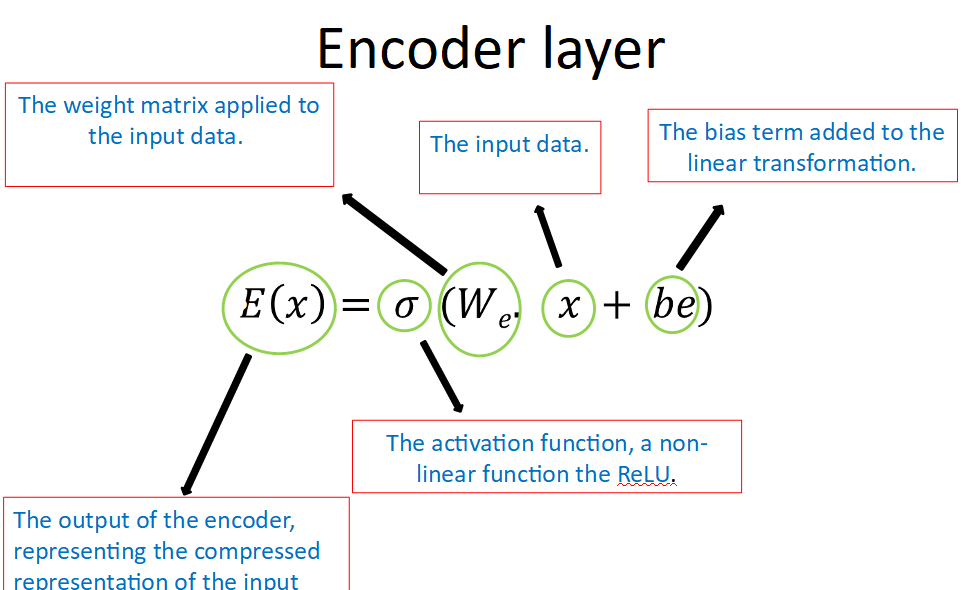 

# *Decoder Layer*
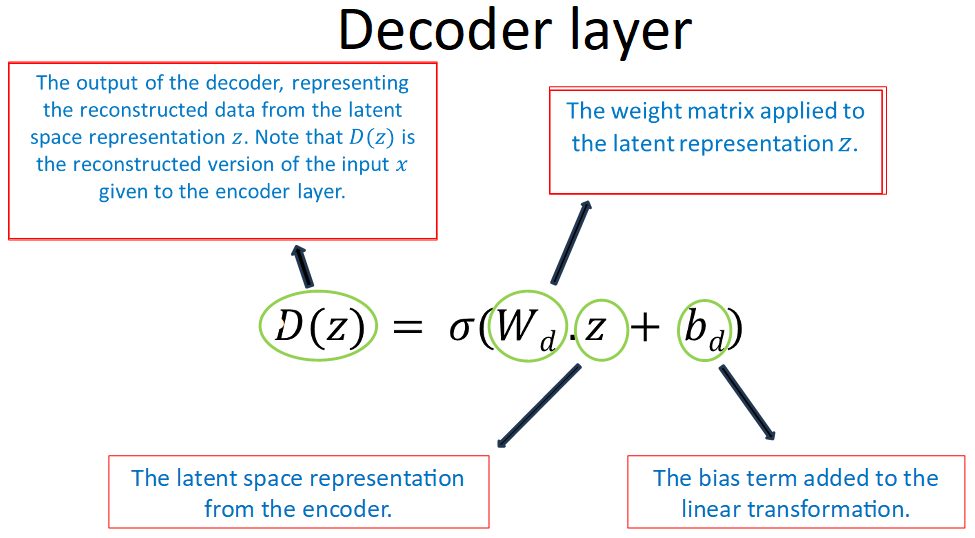

# *Mean Squared Error (MSE)* 
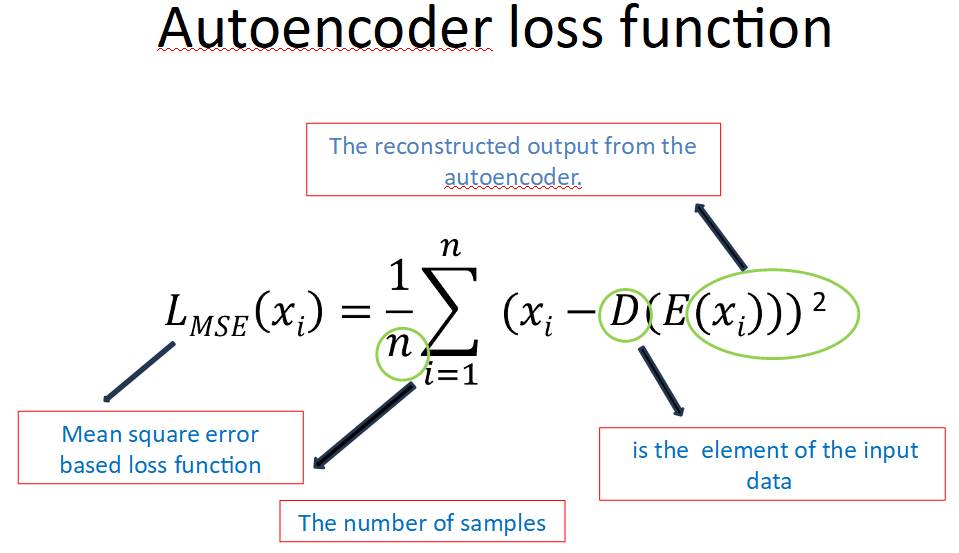

## *Autoendoer Implementation from Scratch (Base Concept + Practice Pupose Only)*
## **Steps: The basics of "AutoEncoder" with it's implementaion using "Numpy" only.**
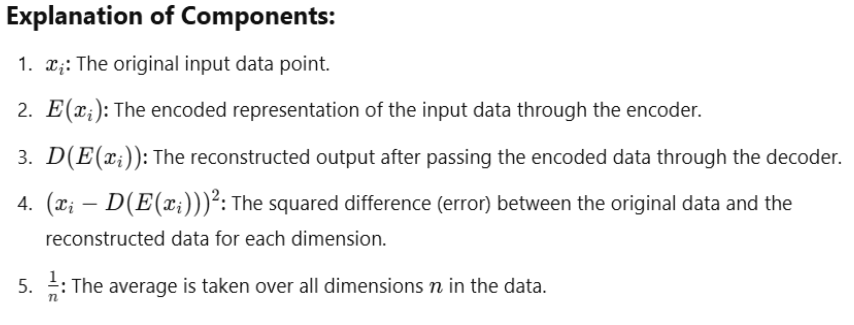 
1. Numpy library 
2. input -> xi  (Self Defined Weights)
3. Encoder/Decoder Weights (Self Defined Weights)
4. Main AutoEncoder_Decoder(): Function that performs the following
- Encoder Calculations
- Decoder  Calculations 
- Mean Squared Error 
5. Display_Data() that displays Encoder, Decoder,and MSE


In [ ]:
import numpy as np  # type: ignore

xi = np.array([1.0, 0.8, 0.5])          # Input data  


wEncoder = np.array([[0.8, 0.3, 0.5],   # Encoder weights
                    [0.4, 0.7, 0.2]])  
 
wDecoder = np.array([[0.9, 0.4],        # Decoder Weights
                     [0.2, 0.7], 
                     [0.5, 0.3]]) 

  
def relu(x):                             # define ReLu  
    return np.maximum(0, x) 


def Autoencoder_Decoder(wEncoder,wDecoder, xi):  
# ---Encoder---
    z = np.dot(wEncoder, xi)           
    activated_z = relu(z)    
     
# ---Decoder---
    x_reconstructed = np.dot(wDecoder, activated_z) 
    activated_reconstructed_x = relu(x_reconstructed)  
      
# ---Mean Squared Error---
    diffrences = []  
    for i,j in zip(xi, activated_reconstructed_x):  
       squeare_errors = pow((i - j),2) 
       diffrences.append(squeare_errors) 

    return ("Encoder :", activated_z),  ("Decoder : ",activated_reconstructed_x), ("Mean Squared Error :",  
                                                                                sum(np.array(diffrences)) / len(diffrences))


def Display_Data(): # Display the Data
   for i,j in Autoencoder_Decoder(wEncoder, wDecoder, xi): # Function Autoencoder_Decoder()
       print(i,j)  
     

Display_Data() # Call the function

Encoder : [1.29 1.06]
Decoder :  [1.585 1.    0.963]
Mean Squared Error : 0.19886466666666677


# Level 2: Implementation of AutoEncoder on image    
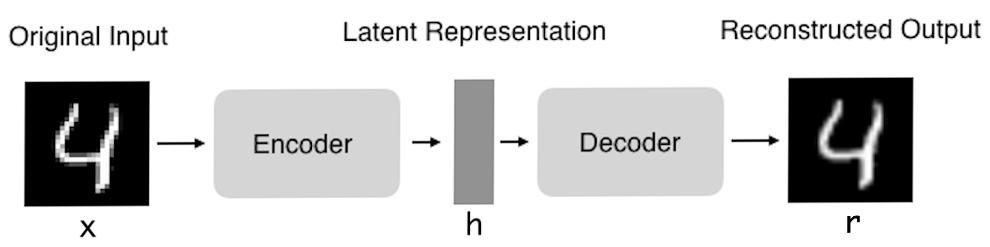 
## Steps:
1. Dependecies (Libraries)
2. ReLU Activation Function
3. Load grayscale image and resize
4. Flatten image into 1D array 
5. Encoder Weights and calculations
6. Decoder Weights and calculations 
7. Finally, Show original and reconstructed images 


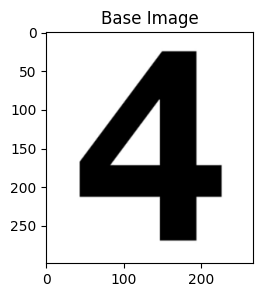

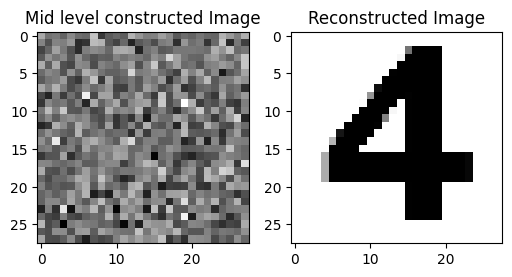

In [17]:
import numpy as np              # type: ignore
import cv2                      # type: ignore
import matplotlib.pyplot as plt # type: ignore

def relu(x):
    return np.maximum(0, x)  # ReLU Activation Function

# Load grayscale image and resize 
img = cv2.imread('image.png')
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)  # Change image path
image = cv2.resize(image, (28, 28))  # Resize to 28x28
image = image / 255.0  # Normalize pixel values (0-1)

# Flatten image into 1D array
x = image.flatten()

# Encoder Weights
wencoder = np.random.rand(100, x.shape[0])  # Random weights
z = np.dot(wencoder, x)
activated_z = relu(z)

# Decoder Weights and calculations
wdecoder = np.random.rand(x.shape[0], 100)
x_reconstructed = np.dot(wdecoder, activated_z)
activated_reconstructed_x = relu(x_reconstructed)

# Reshape to original image size
x_reconstructed_image = activated_reconstructed_x.reshape(28, 28)

# Show original and reconstructed images 
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Base Image") 

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 2)
plt.imshow(image, cmap="gray")
plt.title("Reconstructed Image")

plt.subplot(1, 2, 1)
plt.imshow(x_reconstructed_image, cmap="gray")
plt.title("Mid level constructed Image")
plt.show()